# travelling sale man problem using GA

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from itertools import permutations as perm
import math
import copy

In [2]:
dataset= pd.read_csv('tsp48.csv')
dataset.head()

,city1,city2,city3,city4,city5,city6,city7,city8,city9,city10,...,city39,city40,city41,city42,city43,city44,city45,city46,city47,city48
0,0,4727,1205,6363,3657,3130,2414,563,463,5654,...,3530,825,2188,4820,3489,1947,6835,1542,2379,3744
1,4727,0,3588,2012,1842,6977,6501,5187,5028,2327,...,3085,4564,2756,1591,7027,6186,3472,5461,4390,2088
2,1205,3588,0,5163,2458,3678,3071,1742,1444,4462,...,2482,1027,1395,3617,3891,2686,5661,2023,1867,2560
3,6363,2012,5163,0,2799,8064,7727,6878,6581,1402,...,3669,6011,4638,1681,7987,7502,1877,6758,5360,2844
4,3657,1842,2458,2799,0,5330,4946,4200,3824,2012,...,1252,3227,2426,1169,5313,4706,3241,3962,2651,304


In [6]:
X=dataset.iloc[:, :].values
m=15
alpha=0

print(X)

[[   0 4727 1205 ... 1542 2379 3744]
 [4727    0 3588 ... 5461 4390 2088]
 [1205 3588    0 ... 2023 1867 2560]
 ...
 [1542 5461 2023 ...    0 1644 3928]
 [2379 4390 1867 ... 1644    0 2532]
 [3744 2088 2560 ... 3928 2532    0]]


In [7]:
s0=[]  #solution set intialization
s_best=[]
for i in range(m):
    
        index_city=np.arange(1,48)
        np.random.shuffle(index_city)
        
        s0.append(list(index_city))




In [8]:
iteration=0
while(iteration<1500):
    cost=[] #creaing empty list of cost 
    i=0
    for i in range(m):

        z=[0]+s0[i]+[0]

        c=0
        j=0
        for j in range(len(z)-1):

            c=c+X[z[j]][z[j+1]]
        cost.append(c)
     
    cost=np.array(np.max(cost)-np.array(cost))  #coverting maximum to minimum 
    
    p=[]
    i=0
    if np.sum(cost)==0:
        break;
        
        
    for i in range(m):  #FITNESS 
        x=round(cost[i]/(np.sum(cost)),4)
        p.append(x)
        
    ck=[]
    i=0
   
            
         
    for i in range(m):
        k=round(p[i]*30)
        ck.append(k)
        
    s1=np.array(s0)
        
        
    cs=[]
    i=0
    for i in range(m):  #COST OF CHILDRENS
        x=int(ck[i])
        j=0
        for j in range(x):
            a=np.random.randint(47)
            b=np.random.randint(47)
            temp =s1[i][a]
            s1[i][a]=s1[i][b]
            s1[i][b]=temp
            css=copy.deepcopy(s1[i])
            css=list(css)
            cs.append(css)
        cs.append(s0[i])
            
            
    
    total_cost=[] #creaing empty list of total cost
    l=len(cs)
    solution_set=[]
    i=0
    for i in range(l):

        z=[0]+cs[i]+[0]


        c=0
        j=0
        for j in range(len(z)-1):

            c=c+X[z[j]][z[j+1]]

        total_cost.append(c)

        solution_set.append([c,cs[i]])
    
    a=sorted(solution_set,key=lambda l:l[0])
    
    S1=[]
    s_best.append(a[0][1])
    
    i=0
    if iteration==1000:
        alpha=m-1
   
    for i in range(m-alpha):
        S1.append(a[i][1])

    for i in range(alpha):
    
        index_city=np.arange(1,48)
        np.random.shuffle(index_city)
        
        S1.append(list(index_city))
    
    s0=S1   
    iteration+=1

In [10]:
# BEST SOLUTION VISUALATIZATION
bestcost_list=[] 
bestcost=[]
for i in range(len(s_best)):

    z=[0]+s_best[i]+[0]

    c=0
    for j in range(len(z)-1):

        c=c+X[z[j]][z[j+1]]

    bestcost_list.append(c)

print(s0[0])

z=[0]+s0[0]+[0]

c=0
for j in range(len(z)-1):

    c=c+X[z[j]][z[j+1]]

bestcost.append(c)
print(bestcost)


[21, 2, 22, 33, 40, 15, 7, 8, 39, 14, 11, 24, 47, 41, 9, 23, 38, 12, 46, 20, 31, 44, 34, 25, 3, 1, 28, 4, 13, 10, 19, 29, 5, 18, 36, 27, 35, 6, 17, 43, 45, 32, 42, 16, 26, 30, 37]
[46328]


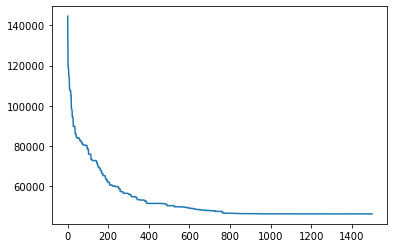

In [11]:
# print(bestcost_list)
plt.plot(bestcost_list)

In [12]:

cityset= pd.read_csv('citytsp.csv')
xy=cityset.loc[:, :].values
cityindex=[0]+s0[0]+[0]
print(len(cityindex))
print(cityindex)
print(len(xy))

49
[0, 21, 2, 22, 33, 40, 15, 7, 8, 39, 14, 11, 24, 47, 41, 9, 23, 38, 12, 46, 20, 31, 44, 34, 25, 3, 1, 28, 4, 13, 10, 19, 29, 5, 18, 36, 27, 35, 6, 17, 43, 45, 32, 42, 16, 26, 30, 37, 0]
48


In [13]:
X1=[]
Y1=[]
for i in range(49):
    x=xy[cityindex[i]][0]
    y=xy[cityindex[i]][1]
    X1.append(x)
    Y1.append(y)
    
                       
X1=np.array(X1)
Y1=np.array(Y1)

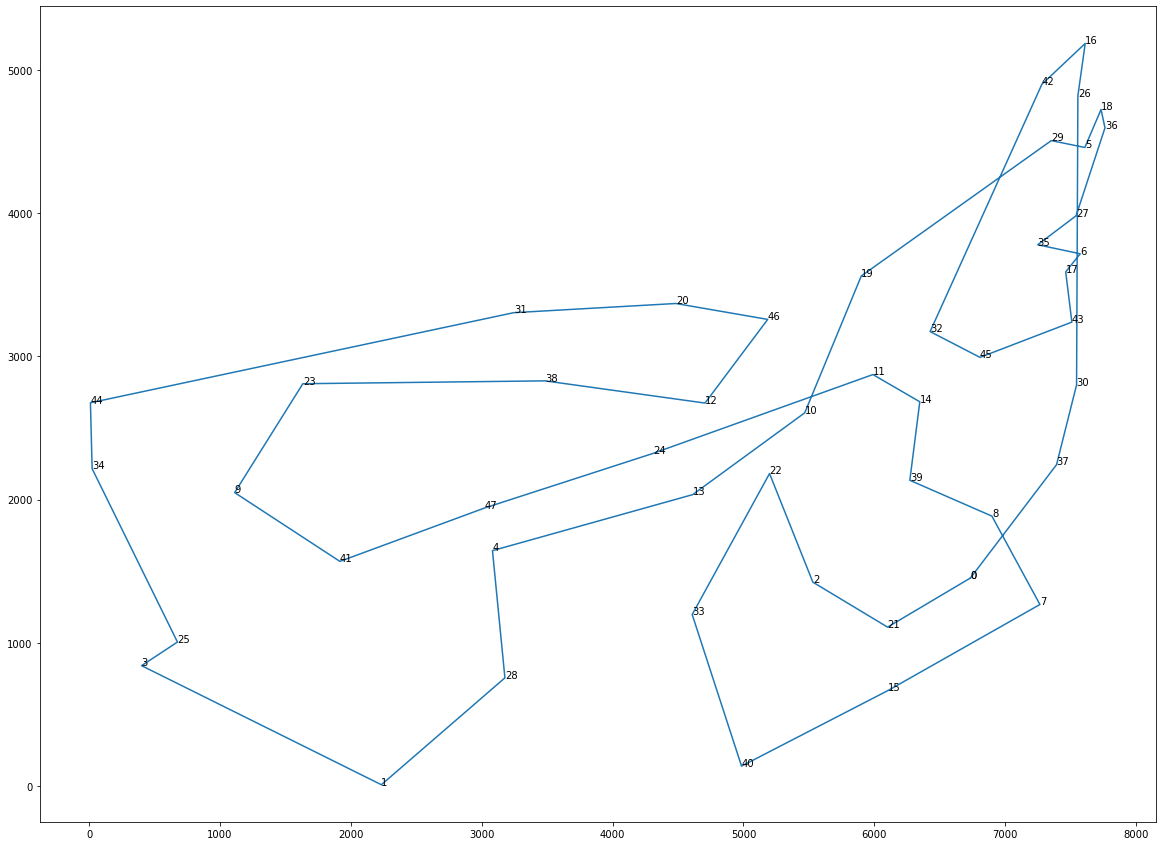

In [14]:
plt.figure(figsize=(20,15))
plt.plot(X1,Y1)

for i, txt in enumerate(cityindex):
    plt.annotate(txt, (X1[i], Y1[i]))
